<a href="https://colab.research.google.com/github/dayanaviana/WGU/blob/main/207-DataExploration_Project/CHURN_1_BivariateAnalisys_QuantitativeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate Analysis for Quantitative Variables

# Descriptive Statistics
Describe and summarize data

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt 
from PyUtils import MyPyUtils as utils

In [2]:
filePath = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_D208-1.csv"

df = pd.read_csv(filePath, index_col=0)
df.columns

Index(['Population', 'Rural', 'Children', 'Age', 'Income', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract_Monthly', 'Port_modem', 'Tablet',
       'InternetService_Fiber', 'InternetService_DSL', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod_Auto', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Population             10000 non-null  int64  
 1   Rural                  10000 non-null  int64  
 2   Children               10000 non-null  int64  
 3   Age                    10000 non-null  int64  
 4   Income                 10000 non-null  float64
 5   Churn                  10000 non-null  int64  
 6   Outage_sec_perweek     10000 non-null  float64
 7   Email                  10000 non-null  int64  
 8   Contacts               10000 non-null  int64  
 9   Yearly_equip_failure   10000 non-null  int64  
 10  Techie                 10000 non-null  int64  
 11  Contract_Monthly       10000 non-null  int64  
 12  Port_modem             10000 non-null  int64  
 13  Tablet                 10000 non-null  int64  
 14  InternetService_Fiber  10000 non-null  int64  
 15  In

In [4]:
# convert Dtype from 'int64' to 'object'
df['Rural'] = df['Rural'].astype('object')
df['Churn'] = df['Churn'].astype('object')
df['Techie'] = df['Techie'].astype('object')
df['Contract_Monthly'] = df['Contract_Monthly'].astype('object')
df['Port_modem'] = df['Port_modem'].astype('object')
df['Tablet'] = df['Tablet'].astype('object')
df['InternetService_Fiber'] = df['InternetService_Fiber'].astype('object')
df['InternetService_DSL'] = df['InternetService_DSL'].astype('object')
df['Phone'] = df['Phone'].astype('object')
df['Multiple'] = df['Multiple'].astype('object')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('object')
df['OnlineBackup'] = df['OnlineBackup'].astype('object')
df['DeviceProtection'] = df['DeviceProtection'].astype('object')
df['TechSupport'] = df['TechSupport'].astype('object')
df['StreamingTV'] = df['StreamingTV'].astype('object')
df['StreamingMovies'] = df['StreamingMovies'].astype('object')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('object')
df['PaymentMethod_Auto'] = df['PaymentMethod_Auto'].astype('object')

df.info()
utils.writeDFToFile(df,"df_info.txt")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Population             10000 non-null  int64  
 1   Rural                  10000 non-null  object 
 2   Children               10000 non-null  int64  
 3   Age                    10000 non-null  int64  
 4   Income                 10000 non-null  float64
 5   Churn                  10000 non-null  object 
 6   Outage_sec_perweek     10000 non-null  float64
 7   Email                  10000 non-null  int64  
 8   Contacts               10000 non-null  int64  
 9   Yearly_equip_failure   10000 non-null  int64  
 10  Techie                 10000 non-null  object 
 11  Contract_Monthly       10000 non-null  object 
 12  Port_modem             10000 non-null  object 
 13  Tablet                 10000 non-null  object 
 14  InternetService_Fiber  10000 non-null  object 
 15  In

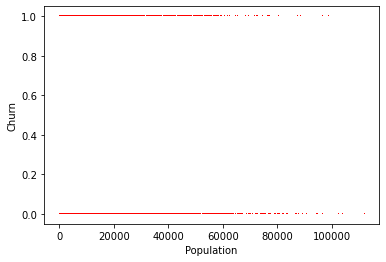

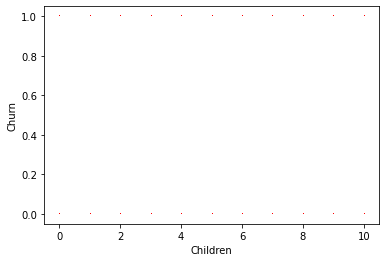

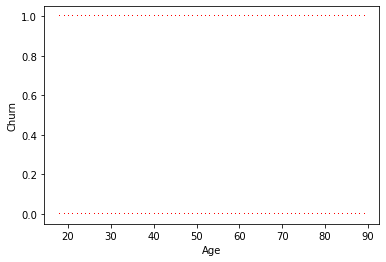

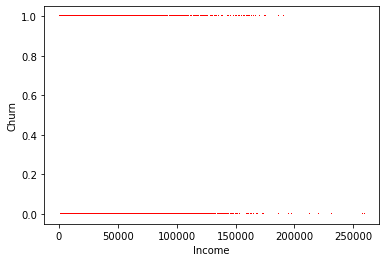

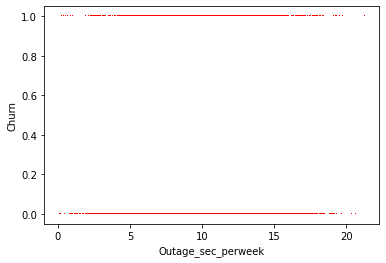

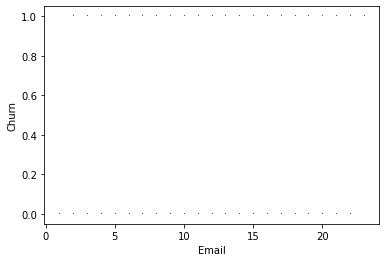

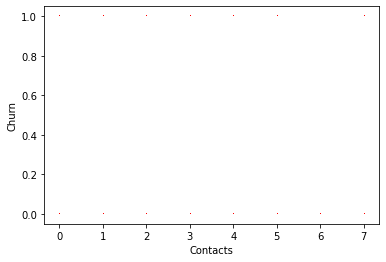

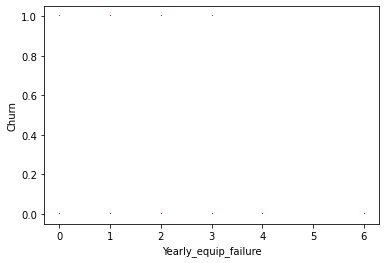

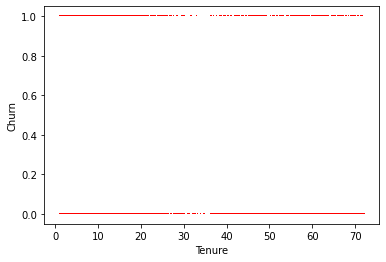

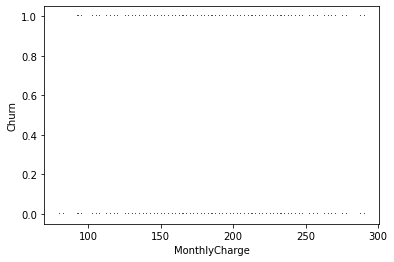

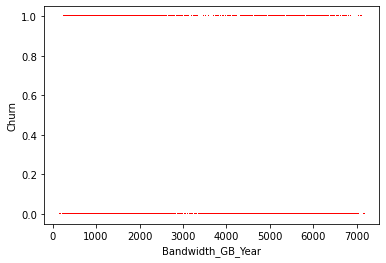

In [5]:

categorical_columns = ['Churn', 'Rural','Techie', 
       'Contract_Monthly', 'Port_modem', 'Tablet',
       'InternetService_Fiber', 'InternetService_DSL', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod_Auto']
numericc_columns = ['Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
all_columns = ['Population', 'Rural', 'Children', 'Age', 'Income', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract_Monthly', 'Port_modem', 'Tablet',
       'InternetService_Fiber', 'InternetService_DSL', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod_Auto', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

# for column_y in categorical_columns:
#        for column_x in numericc_columns:
#               x = df[column_x]
#               y = df[column_y]
#               plt.plot(x, y, ',', color = 'red')
#               plt.xlabel(x.name)
#               plt.ylabel(y.name)
#               plt.show()

for column_x in numericc_columns:
       x = df[column_x]
       y = df["Churn"]
       plt.plot(x, y, ',', color = 'red')
       plt.xlabel(x.name)
       plt.ylabel(y.name)
       plt.show()